In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

## Importing Essential Libraries

The following libraries are imported to enable:
- Building and training neural networks (PyTorch)
- Data loading and augmentation (torchvision, DataLoader)
- Visualization (matplotlib)


In [2]:
# PyTorch and required modules for deep learning and data handling
import torch
from torch import nn, optim

# TorchVision for popular datasets and image transformations
from torchvision import datasets, transforms

# DataLoader utility for batching and shuffling
from torch.utils.data import DataLoader

# Visualization library for plotting data and results
import matplotlib.pyplot as plt

# Import ImageFolder for loading data from directories organized by class
from torchvision.datasets import ImageFolder


## Configuration & Hyperparameters

Set up paths, batch size, class count, and learning parameters for the project.


In [24]:
# Path to the dataset directory (change as needed for your environment)
root = '/kaggle/input/brain-tumor-mri-dataset'

# Subfolders for training and testing splits
train, test = 'Training', 'Testing'

# Batch size for data loading
batch_size = 32

# Number of classes for classification 
num_classes = 4

# Learning rate for optimizer
learning_rate = 0.001

# Number of training epochs
epochs = 10

class_names = test_loader.dataset.classes



## Device Configuration

Select computation device (CPU or GPU) for efficient training.


In [4]:
# Automatically select GPU (cuda) if available, else fallback to CPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Display the current device being used for computation
print(f'Current Device: {device}.')


Current Device: cuda.


## Data Transformations

Preprocess the images by resizing and converting to tensors before feeding them into the neural network.


In [5]:
# Compose a series of image transformations for preprocessing
tf = transforms.Compose([
    # Resize all images to 128x128 pixels
    transforms.Resize((128, 128)),
    
    # Convert images to PyTorch tensors (scales pixel values to [0,1])
    transforms.ToTensor(),
    
    # (Optional) Normalize the tensors - uncomment if normalization is desired
    # transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])


In [6]:
'''train_data = DataLoader(
    datasets.ImageFolder('/kaggle/input/brain-tumor-mri-dataset/Training',tf),
    batch_size=32,shuffle=True,num_workers=4,pin_memory=True
)

test_data = DataLoader(
    datasets.ImageFolder('/kaggle/input/brain-tumor-mri-dataset/Testing',tf),
    batch_size=32,shuffle=False,num_workers=4,pin_memory=True
)'''

"train_data = DataLoader(\n    datasets.ImageFolder('/kaggle/input/brain-tumor-mri-dataset/Training',tf),\n    batch_size=32,shuffle=True,num_workers=4,pin_memory=True\n)\n\ntest_data = DataLoader(\n    datasets.ImageFolder('/kaggle/input/brain-tumor-mri-dataset/Testing',tf),\n    batch_size=32,shuffle=False,num_workers=4,pin_memory=True\n)"

## Prepare Dataset and DataLoader Objects

Load images into PyTorch datasets using `ImageFolder`, and wrap with `DataLoader` for batching and shuffling during training and evaluation.


In [7]:
import os  # Don't forget to import if not already done!

# Load training dataset using ImageFolder and apply preprocessing transforms
train_data = ImageFolder(os.path.join(root, train), transform=tf)

# Wrap training dataset with DataLoader for batching and shuffling
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Load testing dataset using ImageFolder and apply preprocessing transforms
test_data = ImageFolder(os.path.join(root, test), transform=tf)

# Wrap test dataset with DataLoader for batching, no shuffling for evaluation
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Print summary of data loading process
print(f'Batch size: {batch_size}')
print(f'Found {len(train_data)} training images across {num_classes} classes.')
print(f'Found {len(test_data)} testing images across {num_classes} classes.')


Batch size: 32
Found 5712 training images across 4 classes.
Found 1311 testing images across 4 classes.


## Visualize Sample Images from the Training Dataset

Display a grid of sample images along with their class labels to verify dataset integrity and provide an overview of the input data.


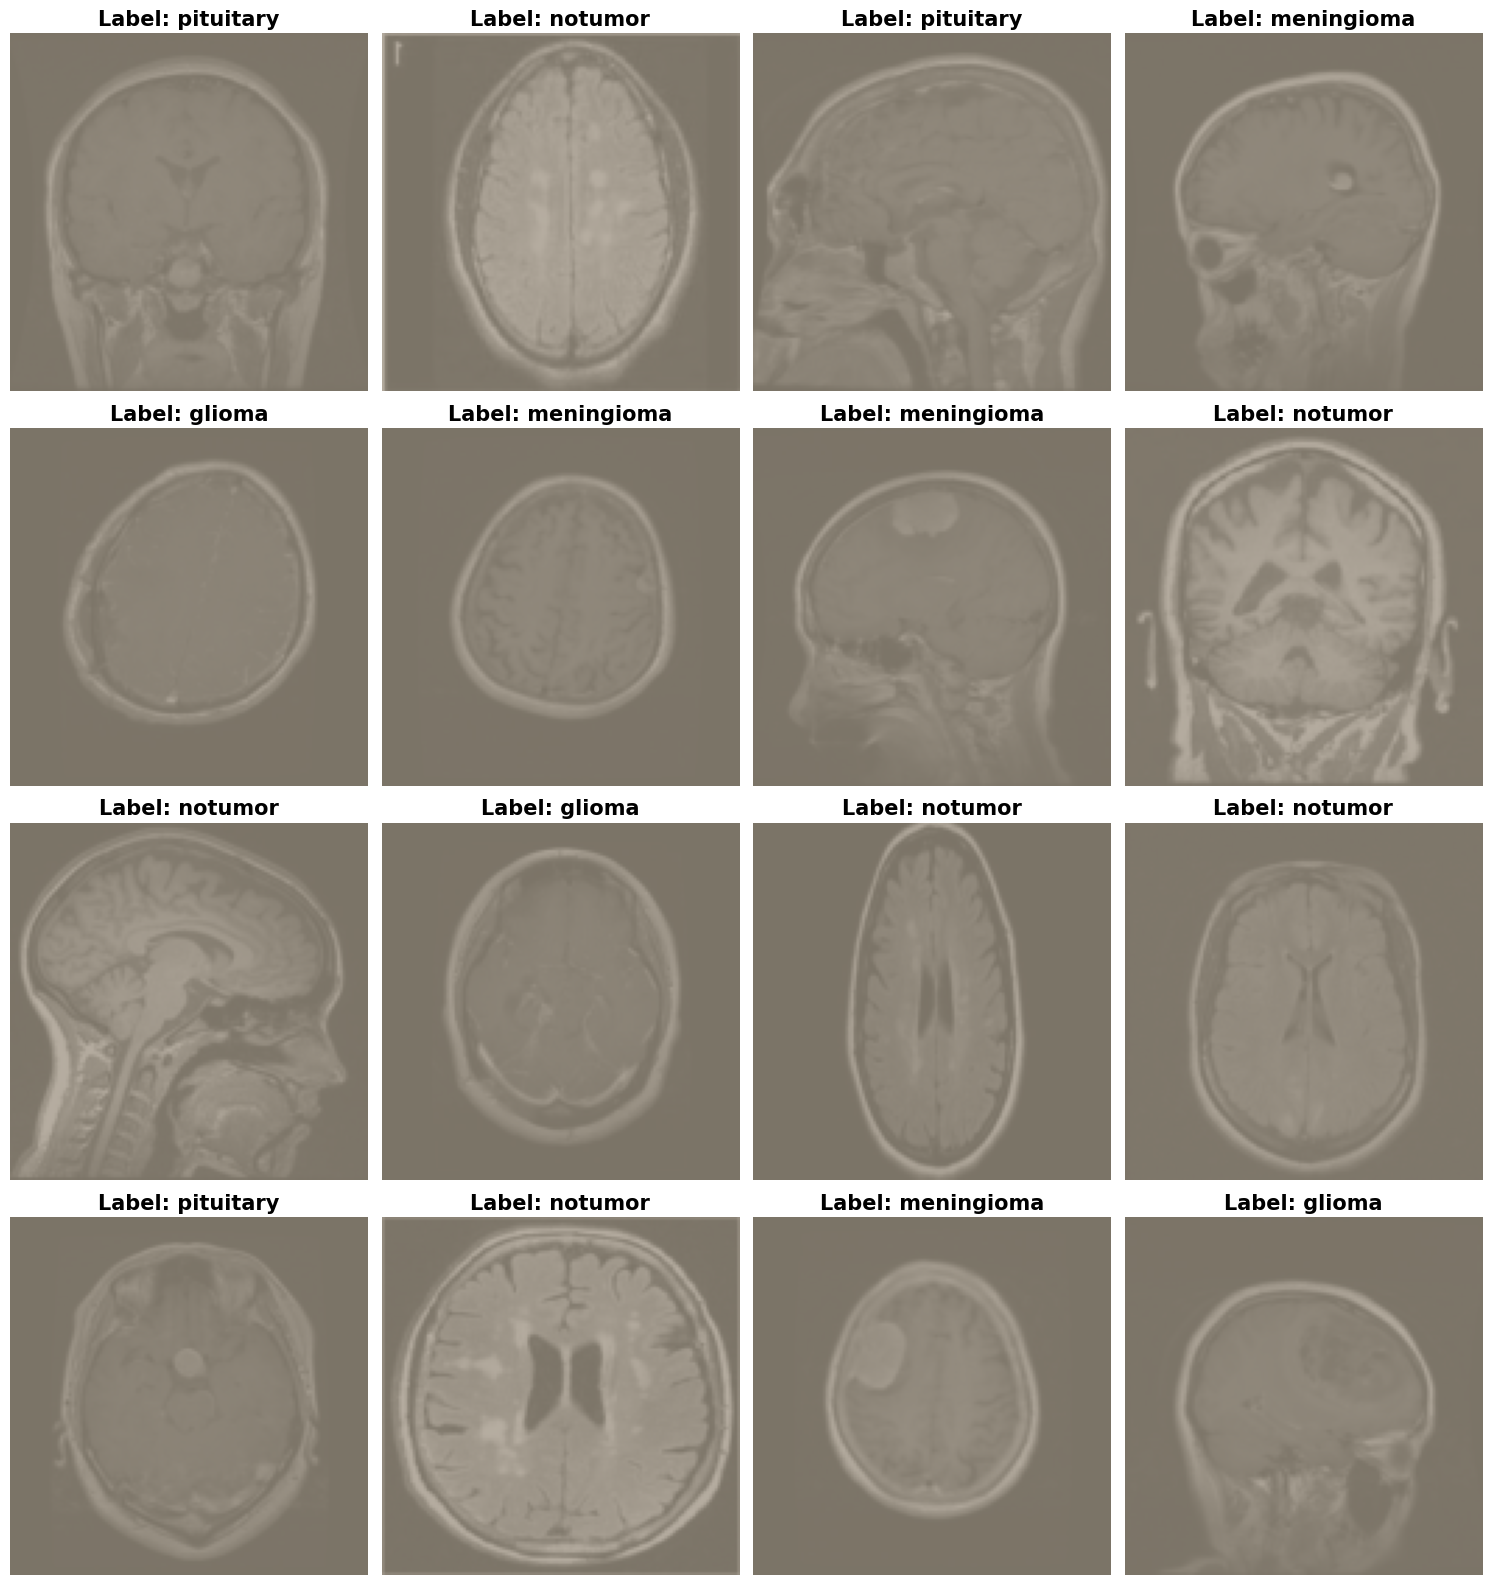

In [8]:
import numpy as np  # Add this import if not already done

# Get a batch of images and labels from the training DataLoader
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Define mean and std for un-normalizing (common for pretrained models, adjust if custom normalization is used)
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

# Convert images from tensors to numpy arrays and un-normalize for proper visualization
images = (images.numpy().transpose((0, 2, 3, 1)) * std + mean).clip(0, 1)

# Set grid dimensions: up to 16 images, in 4 rows
num_images = min(len(images), 16)
rows = 4
fig, axes = plt.subplots(rows, 4, figsize=(15, 4 * rows))

for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(images[i])
        ax.set_title(f'Label: {train_data.classes[labels[i]]}', fontsize=15, fontweight='bold')
        ax.axis('off')

# Hide unused subplots if batch size < grid size
for ax in axes.flat[num_images:]:
    ax.axis('off')

plt.tight_layout(pad=1)
plt.show()


## Model Architecture: Brain Tumor Classifier (Custom CNN)

Define a Convolutional Neural Network (CNN) using PyTorch for multi-class classification of brain tumor MRI images. The architecture includes convolutional layers for feature extraction and fully connected layers for classification.


In [16]:
# Define a custom CNN model for brain tumor classification
class BrainTumorClassifier(nn.Module):
    def __init__(self, num_classes):
        super(BrainTumorClassifier, self).__init__()
        
        # Feature extraction: three convolutional blocks (Conv + ReLU + MaxPool)
        self.feature_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=4, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3),

            nn.Conv2d(32, 64, kernel_size=4, padding=1),
            nn.ReLU(inplace=False),
            nn.MaxPool2d(kernel_size=3),

            nn.Conv2d(64, 128, kernel_size=4, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3)
        )

        self.flatten = nn.Flatten()  # Flatten feature map for dense layers

        # Fully connected layers for classification
        self.dense_layers = nn.Sequential(
            nn.Linear(2048, 512),   # Adjust input size as per feature map output
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.feature_layers(x)
        # Optional: print shape for debugging (uncomment if needed)
          #print('Shape before flatten:', x.shape)
        x = self.flatten(x)
          #print('Shape after flatten:', x.shape)
        x = self.dense_layers(x)
        return x

# Instantiate model, move to device (GPU/CPU)
model = BrainTumorClassifier(num_classes=len(train_data.classes)).to(device)

# Set loss function for multi-class classification
criterion = nn.CrossEntropyLoss()

# Adam optimizer for training
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Print a summary of the model architecture
print(model)


BrainTumorClassifier(
  (feature_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dense_layers): Sequential(
    (0): Linear(in_features=2048, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=512, out_features=4, bias=True)
  )
)


## Model Training Loop

Train the CNN model for multiple epochs on the training dataset, optimizing the model parameters using the Adam optimizer and reporting the loss after each epoch.


In [17]:
# Set model to training mode (enables dropout/batchnorm if used)
model.train()

# Training loop: iterate for the specified number of epochs
for epoch in range(epochs):
    running_loss = 0.0  # Track cumulative loss for the epoch

    # Loop over each batch in the training dataset
    for images, labels in train_loader:
        # Move data to selected device (CPU or GPU)
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()  # Reset parameter gradients
        
        # Forward pass: compute model outputs, then calculate loss
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backpropagation: compute gradients
        loss.backward()
        
        # Update model weights
        optimizer.step()
        
        # Accumulate loss
        running_loss += loss.item()
    
    # Calculate average loss for the epoch
    avg_loss = running_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{epochs}: Average Loss = {avg_loss:.4f}')


Epoch 1/10: Average Loss = 0.8212
Epoch 2/10: Average Loss = 0.4509
Epoch 3/10: Average Loss = 0.3154
Epoch 4/10: Average Loss = 0.2377
Epoch 5/10: Average Loss = 0.2002
Epoch 6/10: Average Loss = 0.1492
Epoch 7/10: Average Loss = 0.1036
Epoch 8/10: Average Loss = 0.0859
Epoch 9/10: Average Loss = 0.0698
Epoch 10/10: Average Loss = 0.0624


## Model Evaluation on Test Data

Evaluate the trained CNN model on the test dataset. Compute the average test loss and overall accuracy to assess model performance.


In [18]:
# Set the model to evaluation mode (disables dropout/batchnorm)
model.eval()

test_loss = 0.0  # Track total test loss
correct = 0      # Track number of correct predictions

with torch.no_grad():  # No gradient computation needed during evaluation
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        
        logits = model(images)  # Forward pass
        # Accumulate loss; multiply by batch size for correct averaging later
        test_loss += criterion(logits, labels).item() * labels.size(0)
        
        # Get predicted class (highest logit) for each sample
        preds = logits.argmax(dim=1)
        # Count how many predictions match the true label
        correct += (preds == labels).sum().item()

# Average test loss over all samples
test_loss /= len(test_loader.dataset)
# Compute accuracy as percentage of correct predictions
accuracy = 100.0 * correct / len(test_loader.dataset)

print(f'Test Loss: {test_loss:.4f}   Test Accuracy: {accuracy:.2f}%')


Test Loss: 0.0840   Test Accuracy: 96.95%


## Visualize Random Test Images with Model Predictions

Display random test samples along with their predicted and true class labels to visually assess model performance and spot-check inference results.


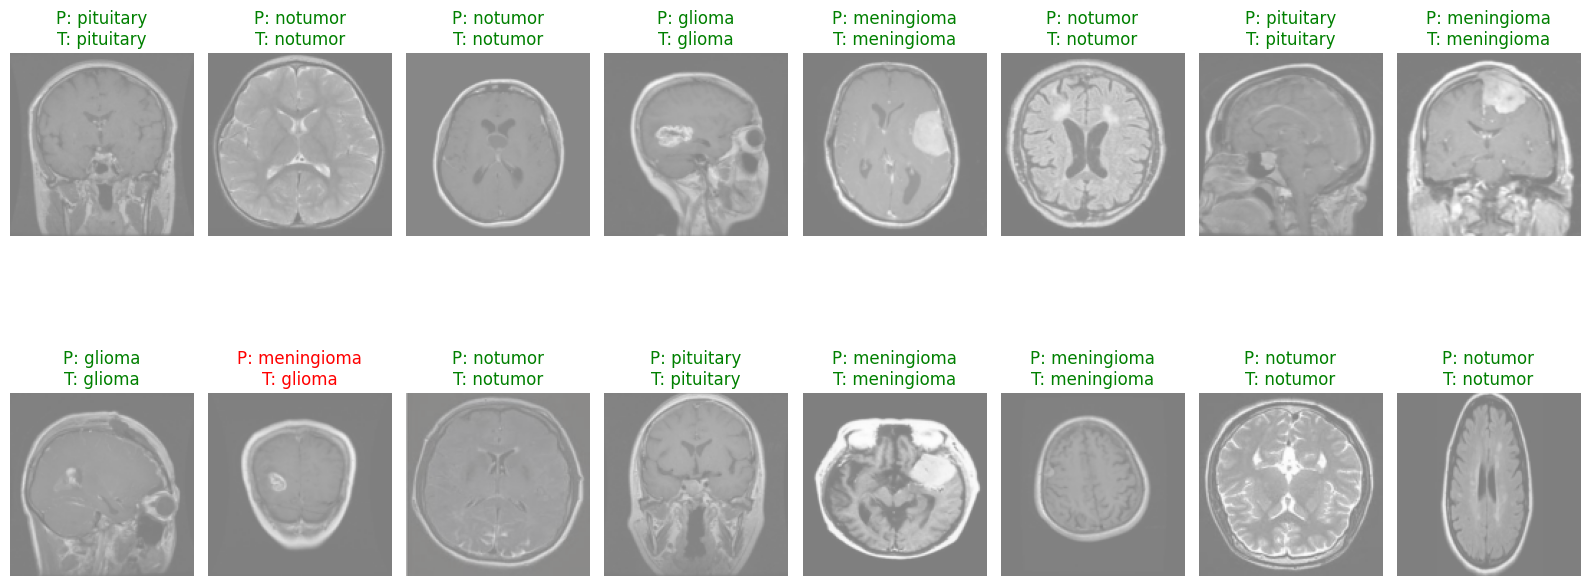

In [25]:
import numpy as np
import random
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

# Select N sample predictions, e.g., 16
N = 16
indices = np.random.choice(len(test_loader.dataset), N, replace=False)
plt.figure(figsize=(16,8))
for i, idx in enumerate(indices):
    img, true_label = test_loader.dataset[idx]
    img_disp = img * 0.5 + 0.5  # unnormalize if needed
    pred = model(img.unsqueeze(0).to(device)).argmax(1).item()
    plt.subplot(2, 8, i+1)
    plt.imshow(to_pil_image(img_disp))
    color = "green" if pred == true_label else "red"
    plt.title(f"P: {class_names[pred]}\nT: {class_names[true_label]}", color=color)
    plt.axis("off")
plt.tight_layout()
plt.show()
